In [14]:
import pandas as pd
# iris 데이터는 sklearn에서 직접 로드할 수 있습니다.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [15]:
dataset = load_iris()
# pandas의 데이터프레임 형태로 데이터를 저장
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
# 레이브(타깃)을 데이터프레임에 저장
df['target'] = dataset.target
# 숫자 형태의 레이블을 문자로 변경(이해를 돕기 위해)
df.target = df.target.map({0: 'setosa', 1: 'versicolor', 2:'virginica'})
# 데이터 확인
df
#   꽃받침 길이,   꽃받침 너비,   꽃잎 길이,      꽃잎 너비,    붓꽃(iris)의 종류

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [16]:
setosa_df = df[df.target == 'setosa']
versicolor_df = df[df.target == 'versicolor']
virginica_df = df[df.target == 'virginica']

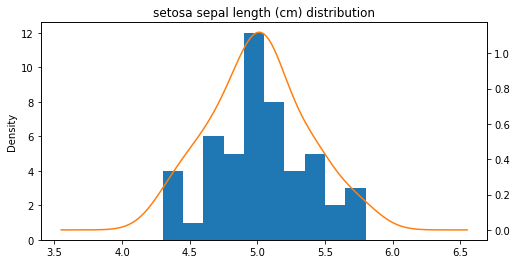

In [17]:
ax = setosa_df['sepal length (cm)'].plot(kind='hist')
setosa_df['sepal length (cm)'].plot(kind='kde', ax=ax,
                                   secondary_y = True,
                                   title = 'setosa sepal length (cm) distribution',
                                   figsize = (8,4))

In [18]:
# 다른 꽃들 종류도, 길이, 너비도 모두 정규분포와 유사함
# -> 가우시안 NB를 사용하기 적합하다!

In [41]:
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2)

In [42]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
expected = y_test
predicted = model.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [44]:
accuracy_score(y_test, predicted)

1.0